# 使⽤ ⼿寫辨識資料集來進⾏資料分類並顯⽰正確率。 
### from sklearn import datasets 
### digits = datasets.load_digits() 
### 使⽤整體資料中 80% 為訓練集，其他為測試集。 
### 切分時使⽤相同 Seed 避免每次取得不同 Dataset 
### 使⽤與 KNN 不同的分類演算法進⾏分類。 
### 在 jupyter notebook 上說明分析思路，流程，以及結果，包含分類正確與錯誤的資料 範例。
### Reference 
### Digits Dataset 
### Recognizing hand-written digits

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA
digits = datasets.load_digits()
dir(digits) #了解資料有哪些

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [23]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

64維度

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.frame

In [8]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 圖形畫出手寫數字

<Figure size 432x288 with 0 Axes>

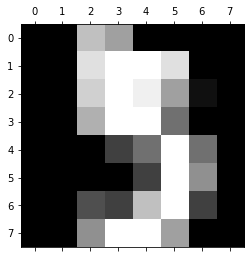

In [27]:
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show() 

In [28]:
# PCA 降維

n_comp = 2 #降到2維度

pca = PCA(n_components=n_comp) #n_components=n n=設定n維度
X_r = pca.fit_transform(X) #將X_r 變成2維度

In [53]:
X_r

array([[ -1.25946577,  21.27488247],
       [  7.95761695, -20.76870865],
       [  6.99191902,  -9.95597835],
       ...,
       [ 10.80128399,  -6.9602531 ],
       [ -4.87209626,  12.4239533 ],
       [ -0.34439517,   6.36555868]])

In [29]:
X_r.shape

(1797, 2)

In [19]:
X.shape

(1797, 64)

# 資料分布

targets [0 1 2 3 4 5 6 7 8 9]
label_names [0 1 2 3 4 5 6 7 8 9]
X_r_0 [-1.25946577e+00  1.12150770e+01  6.43536106e+00  2.40928030e-01
  6.13435996e+00  5.01848083e+00  3.93859650e+00  1.03227743e+01
  6.30807706e+00 -3.42946264e+00 -1.26483861e+00  8.55760376e+00
  7.65308832e+00  2.01714721e+00  3.56095805e+00  8.08188414e+00
  6.02371589e+00  4.28913148e+00  2.80966757e+00  1.07821209e+01
  1.06607730e+01  5.71082824e+00  1.47961285e+01  1.13147390e+01
  1.38178903e-01  7.95697315e+00  5.64839404e+00  3.15015426e+00
  6.47393500e-01  5.81795467e+00 -3.16057480e+00  3.66312382e+00
 -6.20412503e-01  1.11442985e+00  1.98321209e+00  3.43968932e+00
  5.22490924e-01  1.18940906e+00  2.47817998e+00 -5.27917379e+00
 -7.93877853e-01  4.54017079e+00  7.51053969e+00 -2.66402195e+00
  2.80545525e+00  5.36541784e+00 -5.40399994e+00  2.17136691e+00
 -9.04378160e-01  8.87331324e-02  2.86331122e+00  6.09023793e-01
 -3.52275065e+00  1.29789692e-01 -6.46914062e+00  2.07581038e-01
 -6.23956731e+00 -2.

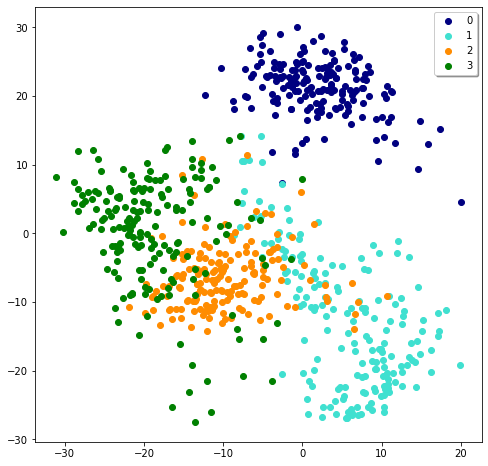

In [49]:
targets = np.unique(digits.target) #不取重複數字 ex:np.unique([0,1,2,2,3,3]) 只出現0,1,2,3
colors = ['navy', 'turquoise', 'darkorange', 'green'] #設定顏色
label_names = digits.target_names #需要的label
print('targets',targets)
print('label_names',label_names)

plt.figure(figsize=(8, 8))
for t, c, n in zip(targets, colors, label_names):
    plt.scatter(X_r[Y==t, 0], X_r[Y==t, 1], c=c, label=n)
    print('X_r_0',X_r[Y==t, 0])
    print('X_r_1', X_r[Y==t, 1])
    
#scatter(X=X_r[0] ，Y=X_r[1] ， c=c 顏色， label取出label的內容)
  
plt.legend(loc="best", shadow=True)

使用 KNN 演算法分類

In [54]:
from sklearn.model_selection import train_test_split #train_test_split資料切分
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 切分資料，建立訓練集與測試集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


# KNN Classification
k = 10 #最近的10個K點 用10個點去投票到底是哪個部分
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

# 預測分類
y_pred = knn_model.predict(x_test)


# 評估結果
acc = accuracy_score(y_true=y_test, y_pred=y_pred)

print(f'預測正確率為： {acc}')

預測正確率為： 0.9694444444444444


# SVM

## 分類

In [55]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics #載入SVM Metrics
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]


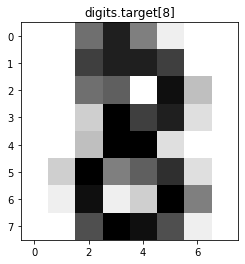

In [56]:
print(digits.images[8]) #此為手寫8所呈現array，很難從array理解此為數字8
plt.imshow(digits.images[8], cmap=plt.cm.gray_r, interpolation='nearest') #透過繪製圖表檢視資料集中數字8
plt.title('digits.target[8]')
plt.show()

In [21]:
digits.target_names 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
writingsamples = len(digits.images) #images的數量
X = digits.images.reshape((writingsamples, 64)) #將8*8的圖像reshape成64 從2維轉成1維
TA = digits.target #將數據集中的目標賦給TA

In [58]:
X.shape,TA.shape #查看特徵值X和預測目標TA的行數，共有1797行，也就是說數據集中共有1797個手寫數字的圖像，64列是經過我們轉化後的灰度值

((1797, 64), (1797,))

## 將數據分割為訓練集和測試集

In [24]:
from sklearn.model_selection import train_test_split #切割資料

### train_test_split() 所接受的變數其實非常單純，基本上為 3 項：『原始的資料』、『Seed』、『比例』
### 原始的資料：切成 Training data 以及 Test data 的原始資料
### Seed：亂數種子，可以固定我們切割資料的結果
### 比例：可以設定 train_size 或 test_size，只要設定一邊即可，範圍在 [0-1] 之間

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, TA, test_size=0.2, random_state=999) 
#隨機抽取生成訓練集和測試集，其中訓練集的比例為80%，測試集20%，亂數種子999


In [93]:
#查看訓練集的行數
X_train.shape,Y_train.shape

((1437, 64), (1437,))

## 對SVM模型進行訓練

In [90]:
from sklearn.svm import SVC
clf =  SVC()#SVM開台方法

In [75]:
Y_train

array([7, 2, 0, ..., 1, 9, 2])

In [95]:
clf.fit(X_train,Y_train)    #機器變數名稱.fit(輸入資料, 正確答案)

SVC()

In [96]:
clf.score(X_test, Y_test) #使用測試集衡量分類模型準確率 98.3%

0.9833333333333333

### 預測結果

In [99]:
predict_1 = clf.predict(X_test) #機器變數名稱.predict(要預測的Array)

In [100]:
predict_1[:100] #查看前100個測試集的預測結果

array([9, 3, 3, 1, 3, 6, 9, 6, 1, 4, 8, 8, 4, 5, 8, 8, 3, 6, 9, 1, 9, 2,
       2, 5, 7, 6, 8, 8, 2, 2, 6, 0, 2, 2, 3, 0, 2, 6, 0, 0, 2, 1, 3, 9,
       1, 2, 2, 5, 7, 0, 9, 2, 2, 4, 4, 0, 7, 6, 7, 3, 5, 9, 0, 3, 1, 2,
       5, 6, 6, 8, 2, 0, 9, 4, 4, 1, 2, 0, 6, 6, 5, 7, 0, 4, 9, 2, 6, 8,
       1, 9, 4, 0, 9, 0, 7, 6, 2, 0, 6, 8])

In [87]:
# 了解各數字的預測準確度
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(Y_test, predict_1)}\n")

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        45
           3       1.00      0.97      0.99        35
           4       1.00      0.98      0.99        45
           5       0.93      1.00      0.96        27
           6       1.00      1.00      1.00        35
           7       0.97      1.00      0.98        28
           8       0.96      0.96      0.96        27
           9       0.98      0.93      0.95        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360




Confusion matrix:
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 44  0  0  0  0  1]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  1  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  2  0  0  1 40]]


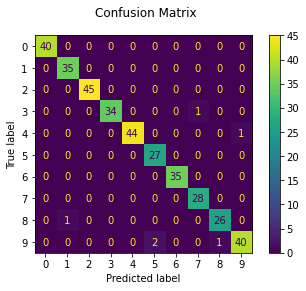

In [88]:
#生成準確率的混淆矩陣(Confusion matrix)
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [89]:
metrics.confusion_matrix(expected, predict_1)

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 40]], dtype=int64)